# Experiment6 网络模型（Network Model）

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

## 规则网络模型

+ random_graphs.random_regular_graph(d, n)方法可以生成一个含有n个节点，每个节点有d个邻居节点的规则图

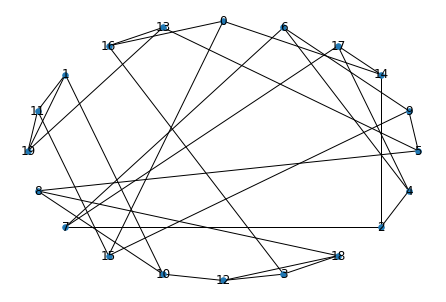

In [2]:
RG = nx.random_graphs.random_regular_graph(3, 20)  # 随机生成20个节点，每个节点的度都是3，构成一个网络图
pos = nx.circular_layout(RG)  # 图形样式，这里是根据图的拉普拉斯特征向量排列节点的
nx.draw(RG, pos, with_labels=True, node_size=30)  # 绘制图形
plt.show()

## ER随机模型

+ ER随机图：以概率p连接N个节点中的每一对节点。
+ 用random_graphs.erdos_renyi_graph(n,p)方法生成一个含有n个节点、以概率p连接的ER随机图

|参数|类型|描述|
|:---|:---|:---|
|n|int|The number of nodes.|
|p|float | Probability for edge creation.|
|seed|int|optional|Seed for random number generator (default=None).|
|directed|bool, optional (default=False)|If True return a directed graph|

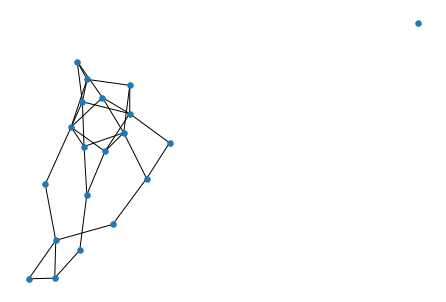

In [3]:
ER = nx.random_graphs.erdos_renyi_graph(20, 0.2)  # 随机生成20个节点，节点间的连接概率都是0.2
pos = nx.spring_layout(ER)  # 图形样式，这里是节点在同心圆上分布
nx.draw(ER, pos, with_labels=False, node_size=30)
plt.show()

## WS小世界模型

+ 用random_graphs.watts_strogatz_graph(n, k, p)方法生成一个含有n个节点、每个节点有k个邻居、以概率p随机化重连边的WS小世界网络。

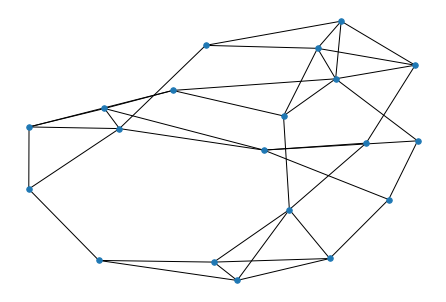

In [4]:
WS = nx.random_graphs.watts_strogatz_graph(20, 4, 0.3)
pos = nx.spring_layout(WS)  # 图形样式，这里是节点在一个圆环上均匀分布
nx.draw(WS, pos, with_labels=False, node_size=30)
plt.show()

+ 验证小世界网络的平均最短路径长度和网络中节点数量的关系

In [5]:
nx.average_shortest_path_length(WS)

2.3105263157894735

## BA无标度网络

+ 用random_graphs.barabasi_albert_graph(n, m)方法生成一个含有n个节点、每次加入m条边的BA无标度网络

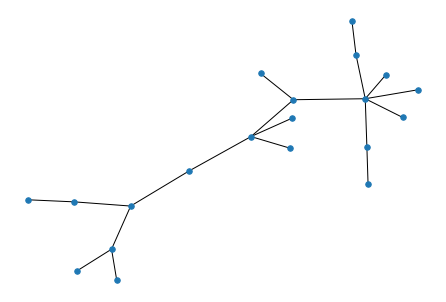

In [6]:
BA = nx.random_graphs.barabasi_albert_graph(20, 1)
pos = nx.spring_layout(BA)  # 图形的布局样式，这里是中心放射状
nx.draw(BA, pos, with_labels=False, node_size=30)
plt.show()

In [7]:
deg=BA.degree
sorted(dict(deg).items(), key=lambda kv: (-kv[1], kv[0]))[:10] ## display a histogram of node degrees                                             ## in 100 bins

[(5, 6),
 (1, 4),
 (2, 3),
 (7, 3),
 (8, 3),
 (4, 2),
 (6, 2),
 (11, 2),
 (13, 2),
 (0, 1)]

+ 验证无标度网络是否服从幂率分布

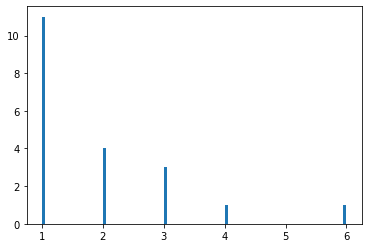

In [8]:
h=plt.hist(dict(deg).values(), bins=100)

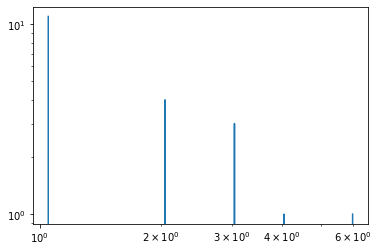

In [9]:
plt.loglog(h[1][1:], h[0]) # 对数-对数柱状图